In [1]:
from math import log, exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def log_fac(n):
    return np.log(np.arange(2, n+1)).sum()
 
def log_binomial(n,k): 
    return (log_fac(n)-log_fac(k)-log_fac(n-k))

def Return_Actual_Prob(N, k, n):
    n1 = log_binomial(N-k, n-1)
    n2 = log_binomial(N, n)
    n3 = log_binomial(N-k, n)
    term_1 = exp(n1-n2)*k
    term_2 = exp(n3-n2)
    return term_1+term_2
    
def Return_Singleton_Prob(N, n, k):
    n1 = log_binomial(N-k, n-k)
    n2 = log_binomial(N, n)
    return exp(n1-n2)

def Return_Approximate_Prob(N, k, n):
    return exp(-k*n/N)*(1+(k*n/N)*exp(k/N))

In [2]:
N = 1773145
alpha = [0.1,0.5,1,5,10]
df = pd.DataFrame()
df_m = pd.DataFrame()
ep = 0.99999
for i in range(len(alpha)):
    actual, approximate = [], []
    s = int(alpha[i]*N/100.0)
    print(s)
    m = []
    for k in list(range(50,1000,1))+list(range(1000, 50000, 500)):
        b = Return_Approximate_Prob(N, k, s)
        #a = Return_Actual_Prob(N, k, s)
        approximate.append(b)
        #actual.append(a)
        if b>0 and b<1:
            m.append((1-ep)/b)
        else:
            m.append(0)
    df[str(s)+'_Approximate'] = approximate
    #df[str(s)+'_Actual'] = actual
    df_m[str(s)+'_Cluster_Size'] = m
df['Cluster_Size'] = np.array(list(range(50,1000,1))+list(range(1000, 50000, 500)))/N
df_m['Cluster_Size'] = list(range(50,1000,1))+list(range(1000, 50000, 500))

1773
8865
17731
88657
177314


      1773_Approximate  8865_Approximate  17731_Approximate  \
0         9.987924e-01      9.735104e-01       9.098084e-01   
1         9.987445e-01      9.725300e-01       9.067611e-01   
2         9.986956e-01      9.715351e-01       9.036844e-01   
3         9.986459e-01      9.705260e-01       9.005791e-01   
4         9.985952e-01      9.695028e-01       8.974462e-01   
...                ...               ...                ...   
1043      1.174366e-19     1.788687e-101      2.538414e-204   
1044      7.198643e-20     1.484356e-102      1.729043e-206   
1045      4.412175e-20     1.231672e-103      1.177612e-208   
1046      2.704024e-20     1.021895e-104      8.019595e-211   
1047      1.657009e-20     8.477592e-106      5.460819e-213   

      88657_Approximate  177314_Approximate  Cluster_Size  
0              0.287305            0.040429      0.000028  
1              0.277197            0.037191      0.000029  
2              0.267392            0.034204      0.000029  
3  

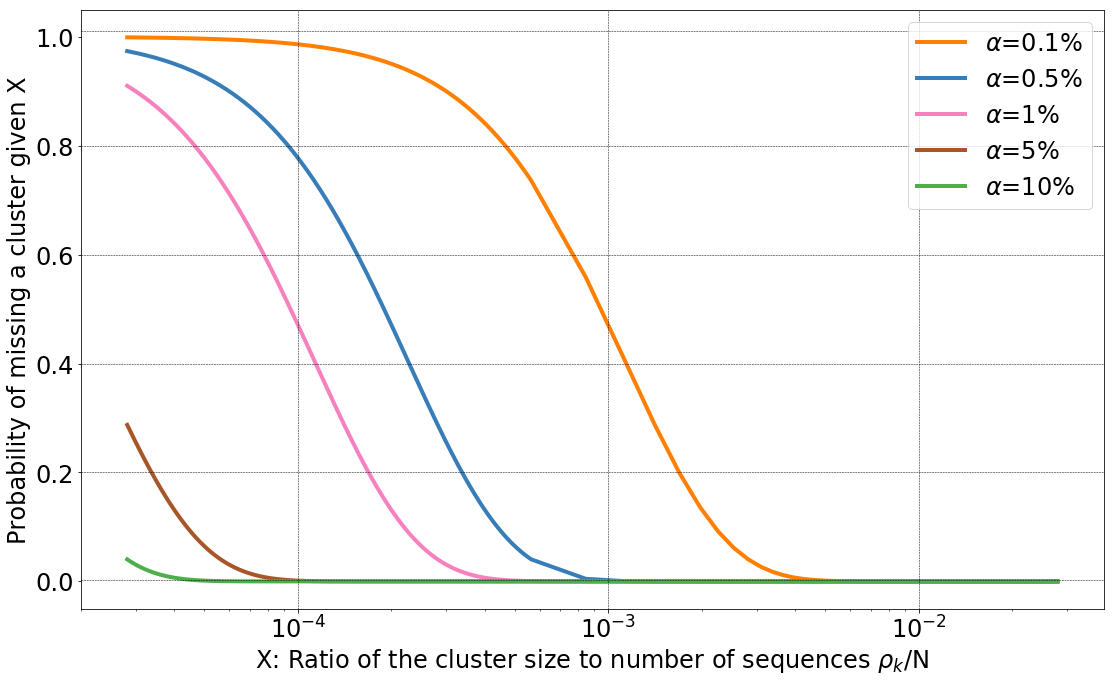

In [4]:
#df = df[df['Cluster_Size'] >= 5 ]
print(df)
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1,figsize = (16,10))
colors = ['#ff7f00','#377eb8','#f781bf', '#a65628', '#4daf4a']
for i in range(len(alpha)):
    s = int(alpha[i]*N/100.0)
    #df.plot('Cluster_Size', str(s)+'_Actual', linewidth=2, color = colors[i], linestyle = '--', ax = ax, 
    #        label = '')
    df.plot('Cluster_Size', str(s)+'_Approximate', linewidth=4, color = colors[i], 
            ax = ax,label = r'$\alpha$='+str(alpha[i])+'%')
#ax.plot([0,0],[0,0], line = )
ax.legend()
ax.set_xlabel(r'X: Ratio of the cluster size to number of sequences $\rho_k$/N')
ax.set_ylabel('Probability of missing a cluster given X')
ax.set_xscale('log')
fig.tight_layout()
ax.axvline(10**-4, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axvline(10**-3, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axvline(10**-2, color = 'black', linestyle = '--', linewidth = 0.5)

ax.axhline(0.002, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axhline(0.2, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axhline(0.4, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axhline(0.6, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axhline(0.8, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axhline(1.01, color = 'black', linestyle = '--', linewidth = 0.5)


fig.savefig('../../Plots/Iterative_Clustering/Probability_Missing_Cluster.pdf')